#Crearemos un programa que nos ayude a prepocesar las imagenes, me refiero a solo tomar una foto cualquiera, y que automaticamente se recorte a 75x75 y capture solo el rostro

In [ ]:
!pip install rarfile
!apt-get install unrar
!pip install rarfile pyminizip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyminizip: filename=pyminizip-0.2.6-cp310-cp310-linux_x86_64.whl size=207075 sha256=ba6497e682b58c2fe6fc259e3b292382eaf7029205708a46ed30ebf0fb51fde6
  Stored in directory: /root/.cache/pip/wheels/ed/6c/ae/0ee601d1139f7ba48c1b572b04707f27427af5290e6fb7afb9
Successfully built pyminizip


In [ ]:
import rarfile
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Función para descomprimir el archivo .rar
def extract_rar(file_path, extract_path):
    with rarfile.RarFile(file_path) as rf:
        rf.extractall(extract_path)

In [ ]:
# Función para detectar, recortar, redimensionar y guardar rostros
def detect_and_crop_faces(image_path, output_path):

    # Cargar el clasificador en cascada de Haar para la detección de rostros
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Leer la imagen
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error al cargar la imagen: {image_path}")
        return

    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detectar rostros en la imagen
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("No se detectaron rostros en la imagen:", image_path)
        return

    # Crear la carpeta de salida si no existe
    os.makedirs(output_path, exist_ok=True)
    # Recortar, redimensionar y guardar cada rostro detectado
    for i, (x, y, w, h) in enumerate(faces):
        face = image[y:y+h, x:x+w]
        resized_face = cv2.resize(face, (70, 70))  # Redimensionar a 70x70 píxeles
        face_filename = os.path.join(output_path, f"face_{os.path.basename(image_path)}_{i+1}.jpg")
        cv2.imwrite(face_filename, resized_face)
        print(f"Rostro guardado como: {face_filename}")
        # Mostrar el rostro recortado y redimensionado en Colab
        cv2_imshow(resized_face)

In [ ]:
# Función para crear el dataset
def crear_dataset(archivo_rar):
  # Ruta del archivo .rar
  rar_file_path = '/content/' + archivo_rar + '.rar'  # Cambia esta ruta a la de tu archivo .rar
  extract_path = '/content/' + archivo_rar

  # Extraer el archivo .rar
  extract_rar(rar_file_path, extract_path)

  # Procesar cada imagen extraída
  output_path = '/content/' + archivo_rar + '_faces'
  for root, dirs, files in os.walk(extract_path):
      for file in files:
          if file.lower().endswith(('.png', '.jpg', '.jpeg', '.jfif', '.webp', '.avif')):
              image_path = os.path.join(root, file)
              detect_and_crop_faces(image_path, output_path)

  print("Procesamiento completado.")

Rostro guardado como: /content/messi_faces/face_BsAr6NMCYAEma2D.png_1.jpg


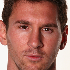

Rostro guardado como: /content/messi_faces/face_a2d04a742dc62f2a57a125210dabe87d.jpg_1.jpg


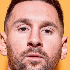

Rostro guardado como: /content/messi_faces/face_LYZBAZLBKZECHPLNDSA6CV6AMI.jpg_1.jpg


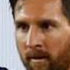

Rostro guardado como: /content/messi_faces/face_messi-inter-miami-eliminated-from-mls-playoff-contention.jpg_1.jpg


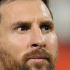

Rostro guardado como: /content/messi_faces/face_messi-adios-psg_4669627_20230603083514.jpg_1.jpg


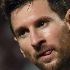

Rostro guardado como: /content/messi_faces/face_lionel-messi-2223-argentina-1.jpg_1.jpg


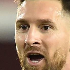

Rostro guardado como: /content/messi_faces/face_lionel-messi-2223-argentina-1.jpg_2.jpg


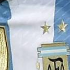

Rostro guardado como: /content/messi_faces/face_lionel-messi-2223-argentina-1.jpg_3.jpg


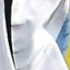

Rostro guardado como: /content/messi_faces/face_1494589903214.jpg_1.jpg


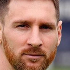

Rostro guardado como: /content/messi_faces/face_165b807990074c238734499c85d6c7cb.jfif_1.jpg


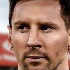

Rostro guardado como: /content/messi_faces/face_images (6).jfif_1.jpg


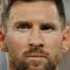

Rostro guardado como: /content/messi_faces/face_GettyImages-1953468339-1140x760.jpg_1.jpg


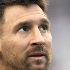

Rostro guardado como: /content/messi_faces/face_peinado-messi-lionel-barcelona_crop1598444967450_crop1598646098192.jpg_493975174.webp_1.jpg


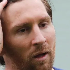

Rostro guardado como: /content/messi_faces/face_XO2KUM7UKRCMXHL65TAX23JWBA.jpg_1.jpg


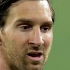

Rostro guardado como: /content/messi_faces/face_XO2KUM7UKRCMXHL65TAX23JWBA.jpg_2.jpg


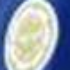

Rostro guardado como: /content/messi_faces/face_95803.jpg_1.jpg


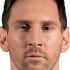

Rostro guardado como: /content/messi_faces/face_messi-deja-carta-enviada-laliga.webp_1.jpg


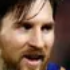

Rostro guardado como: /content/messi_faces/face_62004be4ec23d.jpeg_1.jpg


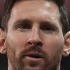

Rostro guardado como: /content/messi_faces/face_images.jfif_1.jpg


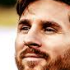

Rostro guardado como: /content/messi_faces/face_13d247ea916bd7daa699a1a5b3914ec9.jpg_1.jpg


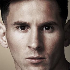

No se detectaron rostros en la imagen: /content/messi/15992826053918.jpg
Rostro guardado como: /content/messi_faces/face_e66440929b2be136617529fee053dae7.jpg_1.jpg


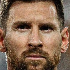

Rostro guardado como: /content/messi_faces/face_e66440929b2be136617529fee053dae7.jpg_2.jpg


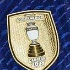

Rostro guardado como: /content/messi_faces/face_e66440929b2be136617529fee053dae7.jpg_3.jpg


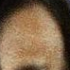

Rostro guardado como: /content/messi_faces/face_JZBGATRQGBBZ3JKWMQH6JWF3ZM.jpg_1.jpg


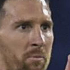

Rostro guardado como: /content/messi_faces/face_180018_1363839.jpg_1.jpg


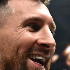

Rostro guardado como: /content/messi_faces/face_6753970.jfif_1.jpg


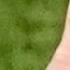

Rostro guardado como: /content/messi_faces/face_6753970.jfif_2.jpg


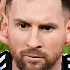

Rostro guardado como: /content/messi_faces/face_6753970.jfif_3.jpg


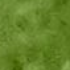

Rostro guardado como: /content/messi_faces/face_messi-psgjpg.webp_1.jpg


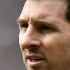

Rostro guardado como: /content/messi_faces/face_lionel-messi-schrei.jpg_1.jpg


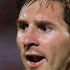

Rostro guardado como: /content/messi_faces/face_lionel-messi-schrei.jpg_2.jpg


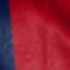

Rostro guardado como: /content/messi_faces/face_lionel-messi-schrei.jpg_3.jpg


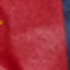

Rostro guardado como: /content/messi_faces/face_lionel-messi-observa-jogadores-durante-argentina-x-australia-jogo-das-oitavas-de-final-da-copa-do-mundo-1670095967128_v2.jpg_1.jpg


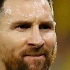

Rostro guardado como: /content/messi_faces/face_v5xX2MvwA_360x240__1.jpg_1.jpg


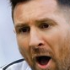

Rostro guardado como: /content/messi_faces/face_fotonoticia_20130717111228_800.jpg_1.jpg


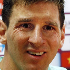

Rostro guardado como: /content/messi_faces/face_jam_a_83802_crop1612792317291.jpg_1.jpg


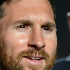

Rostro guardado como: /content/messi_faces/face_GettyImages-1495834586.webp_1.jpg


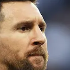

Rostro guardado como: /content/messi_faces/face_messi_1.jpg_1.jpg


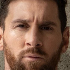

Rostro guardado como: /content/messi_faces/face_download (2).jfif_1.jpg


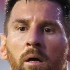

Rostro guardado como: /content/messi_faces/face_images (3).jfif_1.jpg


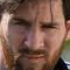

Rostro guardado como: /content/messi_faces/face_63a9c4a00e40a.jpeg_1.jpg


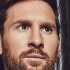

Rostro guardado como: /content/messi_faces/face_63a9c4a00e40a.jpeg_2.jpg


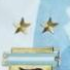

Rostro guardado como: /content/messi_faces/face_1493889268661.jpg_1.jpg


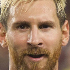

Rostro guardado como: /content/messi_faces/face_images (5).jfif_1.jpg


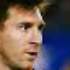

Rostro guardado como: /content/messi_faces/face_610c2f314723c__400x260.webp_1.jpg


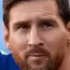

Rostro guardado como: /content/messi_faces/face_610c2f314723c__400x260.webp_2.jpg


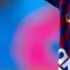

Rostro guardado como: /content/messi_faces/face_81e675510a3276fea56e09da6393b7cb.jpg_1.jpg


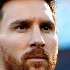

Rostro guardado como: /content/messi_faces/face_625f36b6bb86c.jpeg_1.jpg


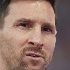

Rostro guardado como: /content/messi_faces/face_388f6bf410f011e9a2d3021976ae6e73.jpg_1.jpg


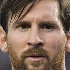

Rostro guardado como: /content/messi_faces/face_images (4).jfif_1.jpg


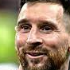

Rostro guardado como: /content/messi_faces/face_71473c732dcfc48d609ffced03270f68.jpg_1.jpg


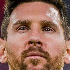

Rostro guardado como: /content/messi_faces/face_71473c732dcfc48d609ffced03270f68.jpg_2.jpg


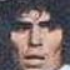

Rostro guardado como: /content/messi_faces/face_968944_crop1610559422606.jpg_1.jpg


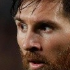

Rostro guardado como: /content/messi_faces/face__127879814_gettyimages-1446545813-1.jpg_1.jpg


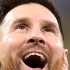

Rostro guardado como: /content/messi_faces/face_8131ab3881a62145cc687a2834566d56.jpg_1.jpg


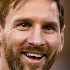

Rostro guardado como: /content/messi_faces/face_3E-qCS2Xb_1290x650__1.jpg_1.jpg


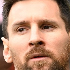

Rostro guardado como: /content/messi_faces/face_gettyimages-1318347857.jpg_1.jpg


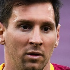

Rostro guardado como: /content/messi_faces/face_download.jfif_1.jpg


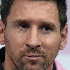

Rostro guardado como: /content/messi_faces/face_15167.png_1.jpg


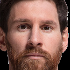

Rostro guardado como: /content/messi_faces/face_000_9qn298_1_0.jpg_1.jpg


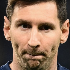

Rostro guardado como: /content/messi_faces/face_16979980215389.jpg_1.jpg


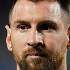

Rostro guardado como: /content/messi_faces/face_primer-plano-de-lionel-messi-con-rostro-serio-645a4f87b3b7d.webp_1.jpg


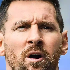

Rostro guardado como: /content/messi_faces/face_el-astro-argentino-lionel-messi-barcelona-celebra-despus-anotar-su-tercer-gol-contra-valencia-barcelona-el-domingo-14-m.webp_1.jpg


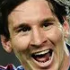

Rostro guardado como: /content/messi_faces/face_USATSI_19100475-545x907.webp_1.jpg


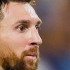

Rostro guardado como: /content/messi_faces/face_messi-seleccion-3jpg.webp_1.jpg


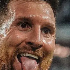

Rostro guardado como: /content/messi_faces/face_000312407W.jpg_1.jpg


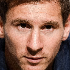

Rostro guardado como: /content/messi_faces/face_Leo-Messi.jpg_1.jpg


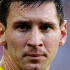

Rostro guardado como: /content/messi_faces/face_messi_vs_mexico.jpeg_1.jpg


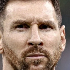

Rostro guardado como: /content/messi_faces/face_lionelmessienelpsg.jpg_1.jpg


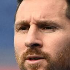

Rostro guardado como: /content/messi_faces/face_lionel_messi_seleccixn_de_argentina_efe.jpg_1.jpg


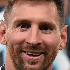

Rostro guardado como: /content/messi_faces/face_lionel_messi_seleccixn_de_argentina_efe.jpg_2.jpg


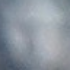

Rostro guardado como: /content/messi_faces/face_messi-epu2.webp_1.jpg


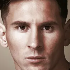

Rostro guardado como: /content/messi_faces/face_58.webp_1.jpg


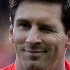

Rostro guardado como: /content/messi_faces/face_58.webp_2.jpg


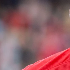

Rostro guardado como: /content/messi_faces/face_640907989278be15dd00c72c.jfif_1.jpg


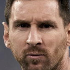

Rostro guardado como: /content/messi_faces/face_messi-08272020-getty-ftr_1xqni5d8owxuf13hjri681fbjx.jpg_1.jpg


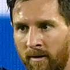

Rostro guardado como: /content/messi_faces/face_messi-08272020-getty-ftr_1xqni5d8owxuf13hjri681fbjx.jpg_2.jpg


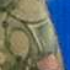

Rostro guardado como: /content/messi_faces/face_images (2).jfif_1.jpg


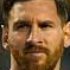

Rostro guardado como: /content/messi_faces/face_c3b55e56-6124-43c9-ba77-0b2ae2377f1f-GTY_1166074663.webp_1.jpg


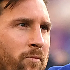

Rostro guardado como: /content/messi_faces/face_c3b55e56-6124-43c9-ba77-0b2ae2377f1f-GTY_1166074663.webp_2.jpg


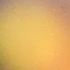

Rostro guardado como: /content/messi_faces/face_c3b55e56-6124-43c9-ba77-0b2ae2377f1f-GTY_1166074663.webp_3.jpg


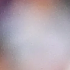

Rostro guardado como: /content/messi_faces/face_4GTGE3E3BBCZDPOOE2RVBFTWNY.jpg_1.jpg


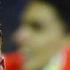

Rostro guardado como: /content/messi_faces/face_4GTGE3E3BBCZDPOOE2RVBFTWNY.jpg_2.jpg


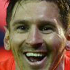

Rostro guardado como: /content/messi_faces/face_leo-messi-ficha-bio-utilizar-1375639723270.jpg_1.jpg


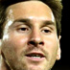

Rostro guardado como: /content/messi_faces/face_86d88.jpg_1.jpg


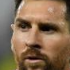

Rostro guardado como: /content/messi_faces/face_E3SPCIFZ35GBDFCJFS26ZNYEAA.jpg_1.jpg


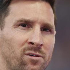

Rostro guardado como: /content/messi_faces/face_images (1).jfif_1.jpg


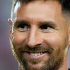

Rostro guardado como: /content/messi_faces/face_lionel-messi-argentina-2022-1_crop1666838398572.jpg_1.jpg


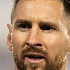

Rostro guardado como: /content/messi_faces/face_messi-getty_crop1670477301750.jpg_1159711837.jpg_1.jpg


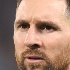

Rostro guardado como: /content/messi_faces/face_fcbarcelona_116525804_511198036342118_4465202861294934264_n_1_crop1596200113433.jpg_423682103.webp_1.jpg


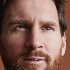

Rostro guardado como: /content/messi_faces/face_lionel_messi_fc_barcelona_regreso_argentina_seleccion_guatemala_soy502.jpg_1.jpg


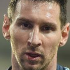

Rostro guardado como: /content/messi_faces/face_qatar-2022.jpg_1.jpg


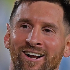

Rostro guardado como: /content/messi_faces/face_BIE4LAV7MNGAHNWFVFMNEVB2MQ.jpg_1.jpg


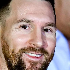

Rostro guardado como: /content/messi_faces/face_43486-list.jpg_1.jpg


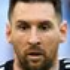

Rostro guardado como: /content/messi_faces/face_VXPIDER6ZNDMZJGLQNOP7EUCMU.jfif_1.jpg


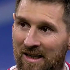

Rostro guardado como: /content/messi_faces/face_UOGOKJBEXFASFDY77H7KAXZDEQ.jpg_1.jpg


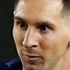

Rostro guardado como: /content/messi_faces/face_resizedcrop-2ee2eb4bf8e0060747bc48a6cb8144c4-840x630.jpg_1.jpg


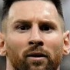

Rostro guardado como: /content/messi_faces/face_resizedcrop-2ee2eb4bf8e0060747bc48a6cb8144c4-840x630.jpg_2.jpg


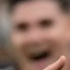

Rostro guardado como: /content/messi_faces/face_resizedcrop-2ee2eb4bf8e0060747bc48a6cb8144c4-840x630.jpg_3.jpg


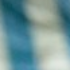

Rostro guardado como: /content/messi_faces/face_messi-argentina_1440x810_wmk.jpg_1.jpg


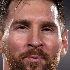

Rostro guardado como: /content/messi_faces/face_messi-primer-plano-psg_1200_800.webp_1.jpg


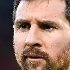

Rostro guardado como: /content/messi_faces/face_HjqsX8vdU_340x340__1.jpg_1.jpg


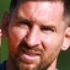

Rostro guardado como: /content/messi_faces/face_75a633c4137e612d2c2328d380c8ce20.jpg_1.jpg


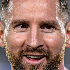

Rostro guardado como: /content/messi_faces/face_redes-sociales-no-vas-creer-que-esta-imagen-lionel-messi-solo-dibujo-n143732-696x418-98854.webp_1.jpg


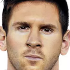

No se detectaron rostros en la imagen: /content/messi/OXCWIZ7SQJHRBD26CFDPDDO6BA.jpg
Rostro guardado como: /content/messi_faces/face_YTk4ZDMzM2E5MzUyODU4ZjIyMDhlMzAzOTg=.thumb.jpg_1.jpg


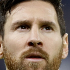

Rostro guardado como: /content/messi_faces/face_UOGOKJBEXFASFDY77H7KAXZDEQ (1).jpg_1.jpg


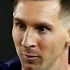

Rostro guardado como: /content/messi_faces/face_16891804902395.webp_1.jpg


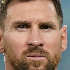

Rostro guardado como: /content/messi_faces/face_download (1).jfif_1.jpg


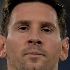

Rostro guardado como: /content/messi_faces/face_Leonel-Messi-1.webp_1.jpg


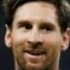

Rostro guardado como: /content/messi_faces/face_Lionel-Messi-fever-drives-sales-for-Inter-Miami-debut-it-may-not-last.jpg_1.jpg


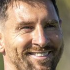

Rostro guardado como: /content/messi_faces/face_Lionel-Messi-fever-drives-sales-for-Inter-Miami-debut-it-may-not-last.jpg_2.jpg


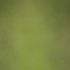

Rostro guardado como: /content/messi_faces/face_qatar-2022 (1).jpg_1.jpg


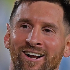

Rostro guardado como: /content/messi_faces/face_1668193010738.webp_1.jpg


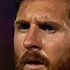

Rostro guardado como: /content/messi_faces/face_Lionel-Messi1-1024x576.webp_1.jpg


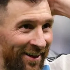

Rostro guardado como: /content/messi_faces/face_12c99bc38b6cea5a4b25de3eef44edb4.jpg_1.jpg


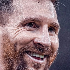

Rostro guardado como: /content/messi_faces/face_1431366-30624175-2560-1440.jpg_1.jpg


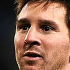

Rostro guardado como: /content/messi_faces/face_images (7).jfif_1.jpg


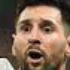

Rostro guardado como: /content/messi_faces/face_images (7).jfif_2.jpg


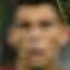

Rostro guardado como: /content/messi_faces/face_lionel-messi.jpg_1.jpg


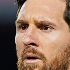

Rostro guardado como: /content/messi_faces/face_610c2f314723c__400x260 (1).webp_1.jpg


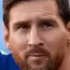

Rostro guardado como: /content/messi_faces/face_610c2f314723c__400x260 (1).webp_2.jpg


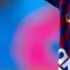

Rostro guardado como: /content/messi_faces/face_1419183-30380419-310-310.jpg_1.jpg


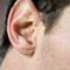

Rostro guardado como: /content/messi_faces/face_fc_barcelona_balon_de_oro_messi_lionel_messi.jpg_1.jpg


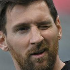

Rostro guardado como: /content/messi_faces/face_1358620964_extras_portadilla_1.jpg_1.jpg


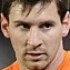

Rostro guardado como: /content/messi_faces/face_IMG_3525-350x250.jpeg_1.jpg


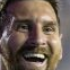

Rostro guardado como: /content/messi_faces/face_20160826-The18-Image-Lionel-Messi-2012-2000x1299.jpg_1.jpg


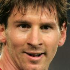

Procesamiento completado.


In [ ]:
crear_dataset('messi')

In [ ]:
import shutil

def comprimir_a_zip(carpeta, archivo_zip):
    shutil.make_archive(archivo_zip, 'zip', carpeta)
    print(f"{carpeta} comprimida como {archivo_zip}.zip")

# Ejemplo de uso
comprimir_a_zip('/content/messi_faces', '/content/messi_faces')

/content/messi_faces comprimida como /content/messi_faces.zip


Rostro guardado como: /content/bellingham_faces/face_download0.jpg_1.jpg


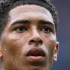

No se detectaron rostros en la imagen: /content/bellingham/images6.jpg
No se detectaron rostros en la imagen: /content/bellingham/jude-bellingham-en-el-calentamiento-previo-al-duelo.jpg
Rostro guardado como: /content/bellingham_faces/face_images2.jpg_1.jpg


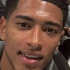

No se detectaron rostros en la imagen: /content/bellingham/download6.jpg
Rostro guardado como: /content/bellingham_faces/face_images1.jpg_1.jpg


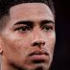

Rostro guardado como: /content/bellingham_faces/face_download4.jpg_1.jpg


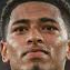

Rostro guardado como: /content/bellingham_faces/face_download1.jpg_1.jpg


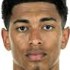

Rostro guardado como: /content/bellingham_faces/face_download2.jpg_1.jpg


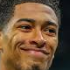

No se detectaron rostros en la imagen: /content/bellingham/images7.jpg
Rostro guardado como: /content/bellingham_faces/face_images9.jpg_1.jpg


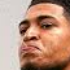

Rostro guardado como: /content/bellingham_faces/face_download.jpg_1.jpg


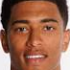

Rostro guardado como: /content/bellingham_faces/face_download12.jpg_1.jpg


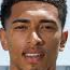

Rostro guardado como: /content/bellingham_faces/face_476943.jpg_1.jpg


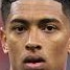

Rostro guardado como: /content/bellingham_faces/face_47694.jpg_1.jpg


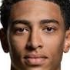

No se detectaron rostros en la imagen: /content/bellingham/images3.jpg
Rostro guardado como: /content/bellingham_faces/face_images4.jpg_1.jpg


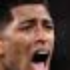

No se detectaron rostros en la imagen: /content/bellingham/download5.jpg
Rostro guardado como: /content/bellingham_faces/face_images0.jpg_1.jpg


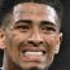

Rostro guardado como: /content/bellingham_faces/face_download32.jpg_1.jpg


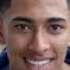

No se detectaron rostros en la imagen: /content/bellingham/images.jpg
Rostro guardado como: /content/bellingham_faces/face_images5.jpg_1.jpg


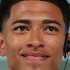

Rostro guardado como: /content/bellingham_faces/face_download7.jpg_1.jpg


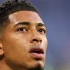

Procesamiento completado.


In [ ]:
crear_dataset('')